**1.Importing the library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


**2.Data loading and data understanding**

In [2]:
df=pd.read_csv('final-dataset.csv')

Initial Inspection

In [4]:
df.shape

(904, 22)

In [5]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
899,900,0,1,1,1,0,1,1,0,1,...,f,Middle Eastern,no,no,Anguilla,yes,6.0,12-15 years,Parent,NO
900,901,1,0,1,0,0,0,0,1,0,...,m,Asian,no,no,India,no,4.0,12-15 years,Parent,NO
901,902,1,0,0,1,1,1,1,1,1,...,f,White-European,no,no,United Kingdom,no,8.0,12-16 years,Self,YES
902,903,1,1,0,1,1,0,0,0,1,...,f,White-European,no,no,United Kingdom,no,6.0,12-16 years,Self,NO
903,904,1,0,1,0,0,1,1,1,1,...,m,Asian,no,no,India,no,6.0,12-16 years,Parent,NO


In [7]:
#display all column of dataframe
pd.set_option('display.max_columns',None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               904 non-null    int64  
 1   A1_Score         904 non-null    int64  
 2   A2_Score         904 non-null    int64  
 3   A3_Score         904 non-null    int64  
 4   A4_Score         904 non-null    int64  
 5   A5_Score         904 non-null    int64  
 6   A6_Score         904 non-null    int64  
 7   A7_Score         904 non-null    int64  
 8   A8_Score         904 non-null    int64  
 9   A9_Score         904 non-null    int64  
 10  A10_Score        904 non-null    int64  
 11  age              904 non-null    float64
 12  gender           904 non-null    object 
 13  ethnicity        904 non-null    object 
 14  jaundice         904 non-null    object 
 15  austim           904 non-null    object 
 16  contry_of_res    904 non-null    object 
 17  used_app_before 

In [9]:
df["age"]=df["age"].astype(int)

In [10]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [11]:
for col in df.columns:
  numerical_features=["ID","age","result"]
  if col not in numerical_features:
    print(f'{col}:{df[col].unique()}')
    print("-"*50)

A1_Score:[1 0]
--------------------------------------------------
A2_Score:[0 1]
--------------------------------------------------
A3_Score:[1 0]
--------------------------------------------------
A4_Score:[0 1]
--------------------------------------------------
A5_Score:[1 0]
--------------------------------------------------
A6_Score:[0 1]
--------------------------------------------------
A7_Score:[1 0]
--------------------------------------------------
A8_Score:[0 1]
--------------------------------------------------
A9_Score:[1 0]
--------------------------------------------------
A10_Score:[1 0]
--------------------------------------------------
gender:['f' 'm']
--------------------------------------------------
ethnicity:['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice:['no' 'yes']
--------------------------------------------------
austim

In [12]:
#dropping ID & used_app_before column
df=df.drop(columns=["ID","used_app_before"])

In [13]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'result',
       'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [14]:
df.rename(columns={'contry_of_res': 'country_of_res'}, inplace=True)

In [15]:
df['country_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh', 'Albania', 'Bahrain', 'Croatia',
       'Indonesia', 'Greenland', 'Comoros', 'Portugal', 'Finland',
       'Norway', 'Anguilla'], dtype=object)

In [16]:
#define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China",
}

# Replace incorrect country names
df['country_of_res'] = df['country_of_res'].replace(mapping)



In [17]:
df["country_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh',
       'Albania', 'Bahrain', 'Croatia', 'Indonesia', 'Greenland',
       'Comoros', 'Portugal', 'Finland', 'Norway', 'Anguilla'],
      dtype=object)

In [18]:
df['Class/ASD'] = df['Class/ASD'].replace({'YES': 1, 'NO': 0})

In [19]:
df["Class/ASD"] = df["Class/ASD"].astype(int)

In [20]:
df["Class/ASD"].value_counts()

Class/ASD
0    680
1    224
Name: count, dtype: int64

**Insights:**

1. Missing values in ethnicity & relation

2. used_app_before column has not significant relation autism so it is removed

3. Fixed country names

4. Identified class imbalance in the target column

**3.Exploratory Data analysis(EDA)**

In [21]:
df.shape

(904, 20)

In [22]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'result',
       'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [23]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,0.579646,0.530973,0.473451,0.448009,0.435841,0.357301,0.411504,0.521018,0.528761,0.621681,26.372788,8.328366,0.247788
std,0.493889,0.499316,0.499571,0.497565,0.496141,0.479470,0.492379,0.499835,0.499448,0.485236,15.991463,4.619565,0.431967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,5.311872,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,22.000000,9.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.250000,12.245695,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [24]:
df['age_desc'] = df['age_desc'].replace({'12-15 years': '12-16 years'})
df['age_desc']

0      18 and more
1      18 and more
2      18 and more
3      18 and more
4      18 and more
          ...     
899    12-16 years
900    12-16 years
901    12-16 years
902    12-16 years
903    12-16 years
Name: age_desc, Length: 904, dtype: object

**Univariant analysis**

Numerical column
- age
- result

In [25]:
#set the desired theme
sns.set_theme(style="darkgrid")

Distribution plots

Mean Age:26.37278761061947
Median Age:22.0


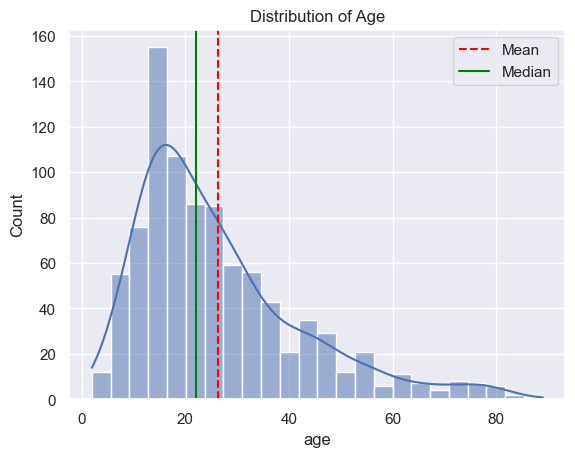

In [26]:
#histogram for "age"

sns.histplot(df["age"],kde=True)
plt.title("Distribution of Age")


#find the mean and median
mean_age=df["age"].mean()
median_age=df["age"].median()
print(f"Mean Age:{mean_age}")
print(f"Median Age:{median_age}")

#add vertical lines for mean and median
plt.axvline(mean_age,color="red",linestyle="--",label="Mean")
plt.axvline(median_age,color="green",linestyle="-",label="Median")
plt.legend()
plt.show()

Mean result:8.328365580974557
Median result:9.0


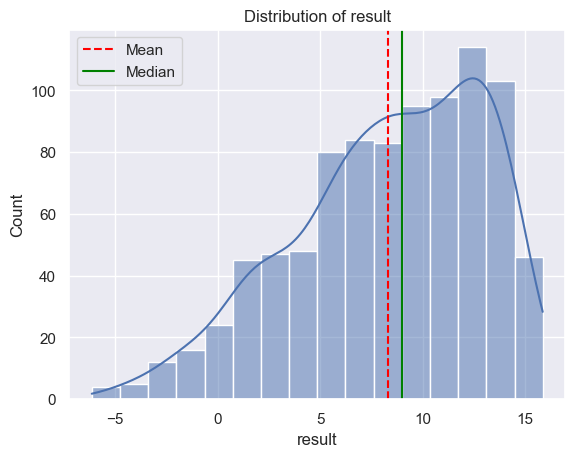

In [27]:
#histogram for "result"

sns.histplot(df["result"],kde=True)
plt.title("Distribution of result")


#find the mean and median
mean_result=df["result"].mean()
median_result=df["result"].median()
print(f"Mean result:{mean_result}")
print(f"Median result:{median_result}")

#add vertical lines for mean and median
plt.axvline(mean_result,color="red",linestyle="--",label="Mean")
plt.axvline(median_result,color="green",linestyle="-",label="Median")
plt.legend()
plt.show()

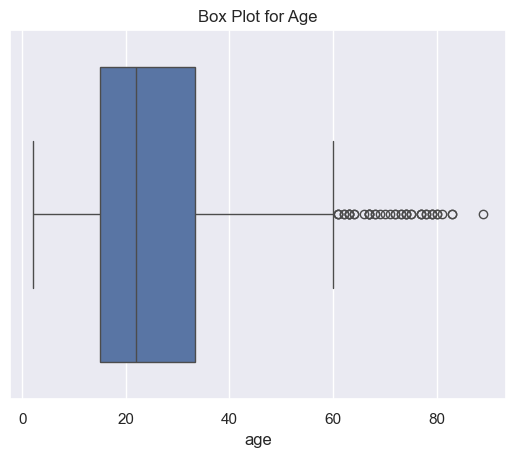

In [28]:
#box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("age")
plt.show()

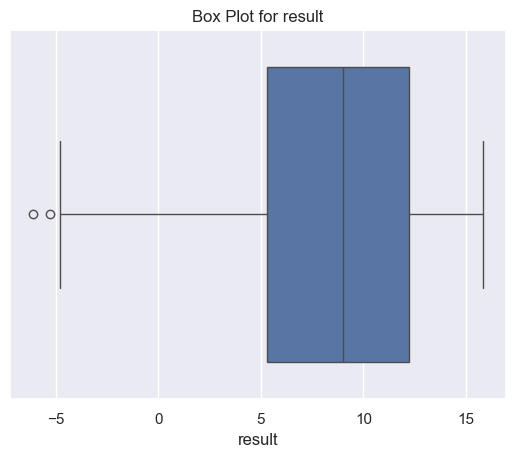

In [29]:
#box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

In [30]:

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")
print(outliers[['age']])  # Display outlier rows

Number of Outliers: 44
     age
19    72
31    74
33    67
41    74
92    75
93    79
114   61
161   79
231   69
238   64
241   64
262   78
264   78
282   63
320   77
344   68
347   62
348   81
352   73
354   80
359   67
440   63
441   73
450   63
460   74
461   79
496   70
508   68
521   61
522   67
529   61
535   83
582   72
596   75
654   89
656   63
674   67
698   62
705   83
714   71
717   77
722   77
747   66
756   80


In [31]:
# count the outlier using IQR method
Q1=df["result"].quantile(0.25)
Q3=df["result"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
result_outliers=df[(df["result"]<lower_bound) | (df["result"]>upper_bound)]
print(f"Number of outliers in result column:{len(result_outliers)}")

Number of outliers in result column:2


Univariate Analysis of categorical columns

In [34]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'result',
       'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

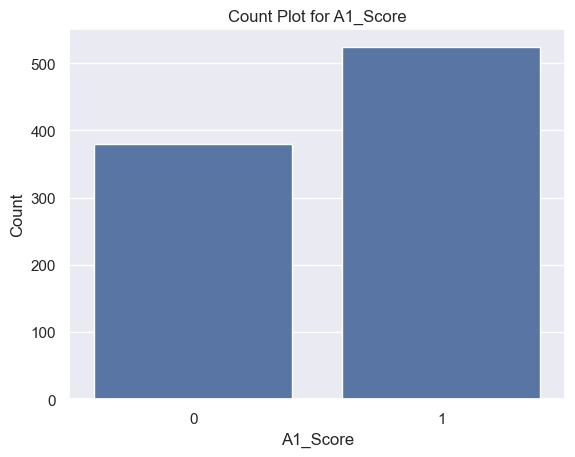

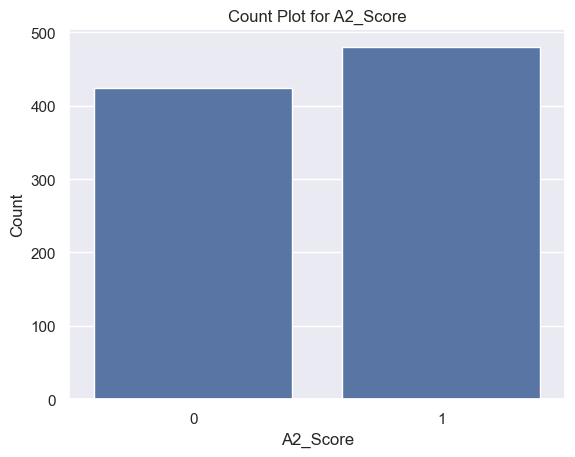

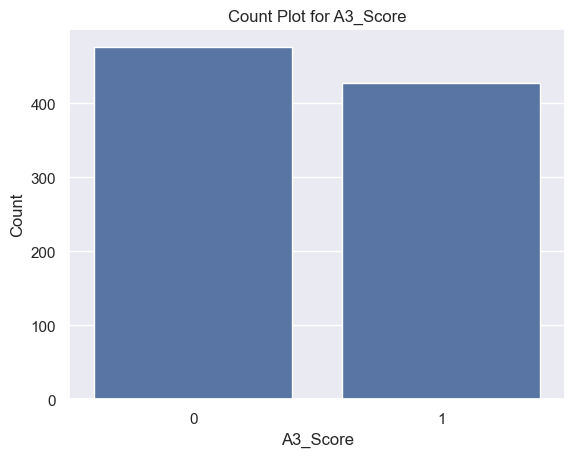

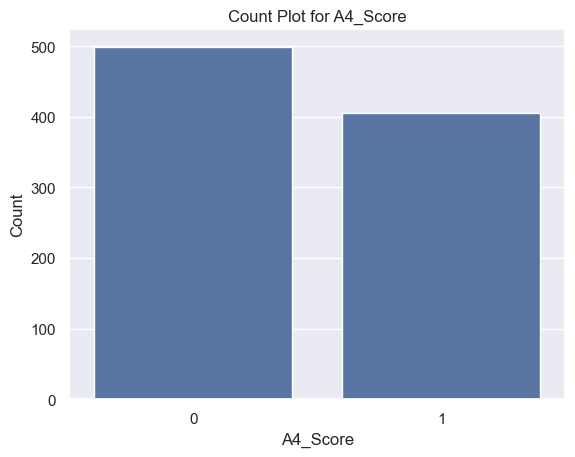

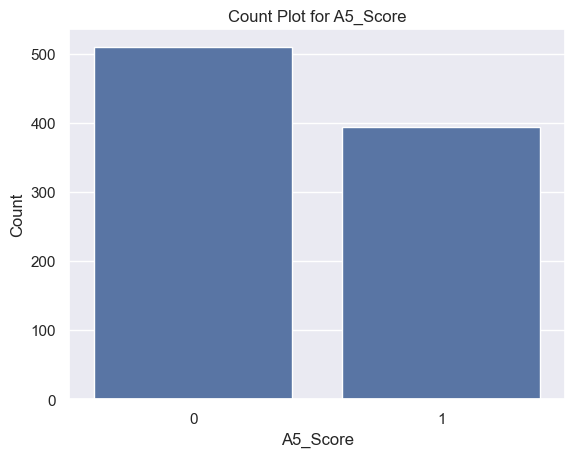

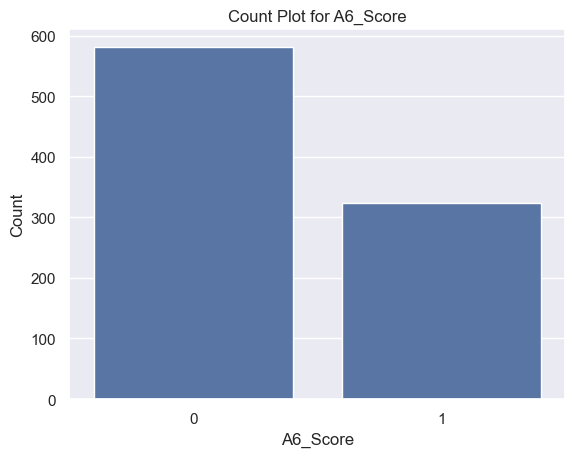

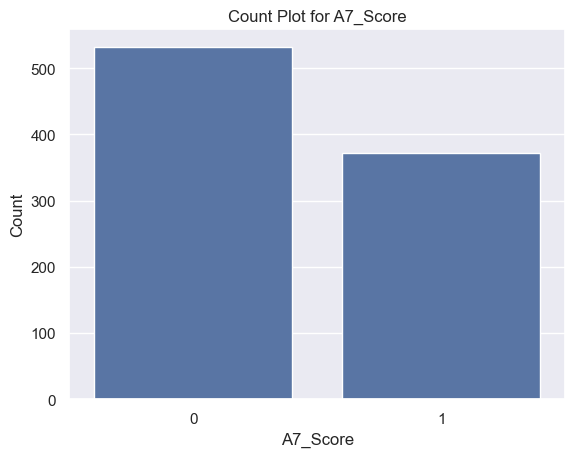

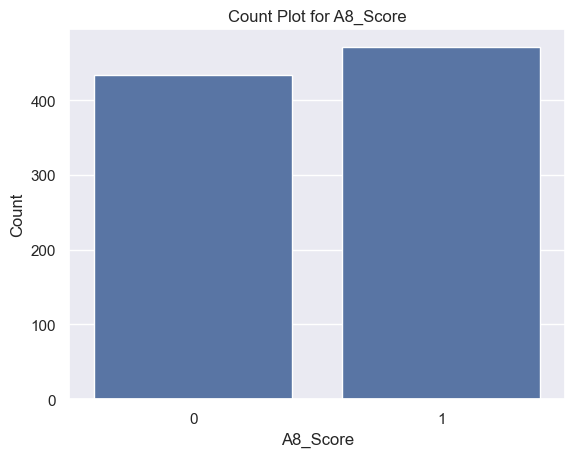

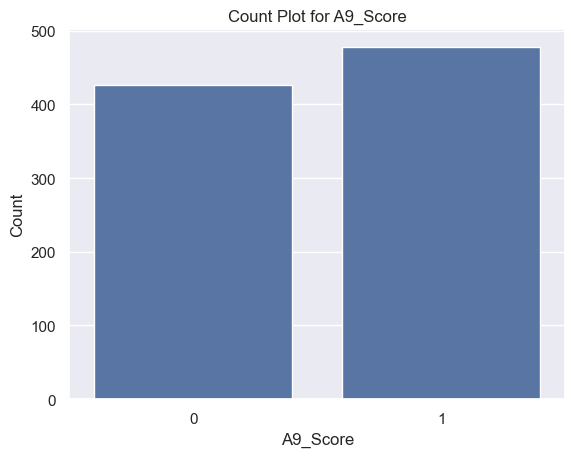

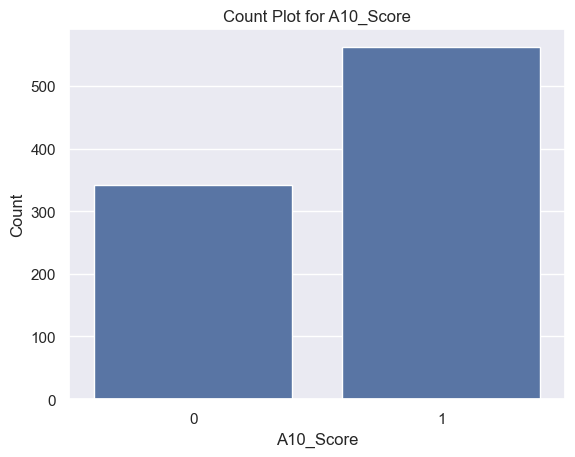

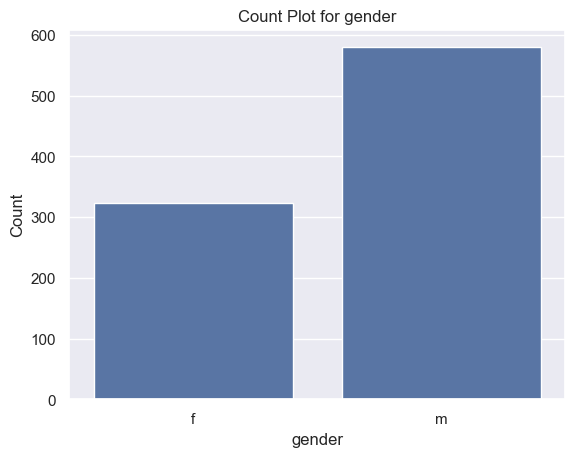

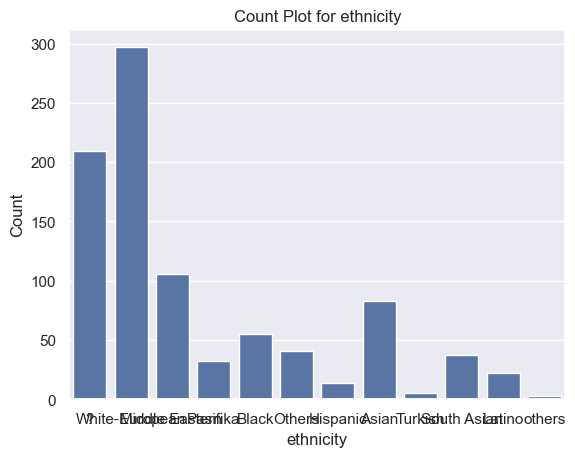

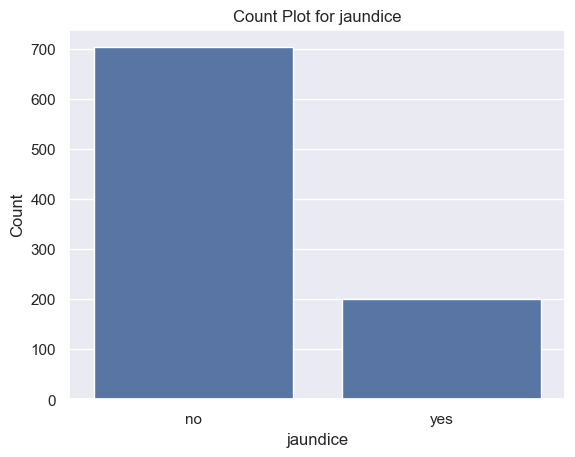

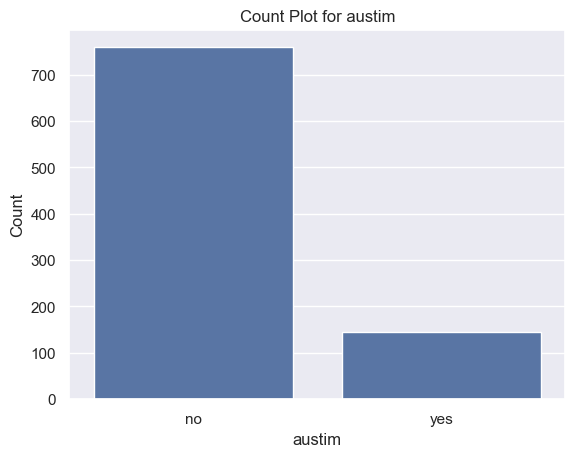

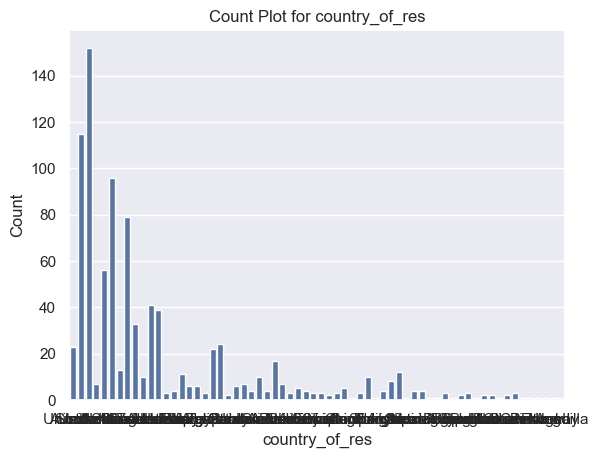

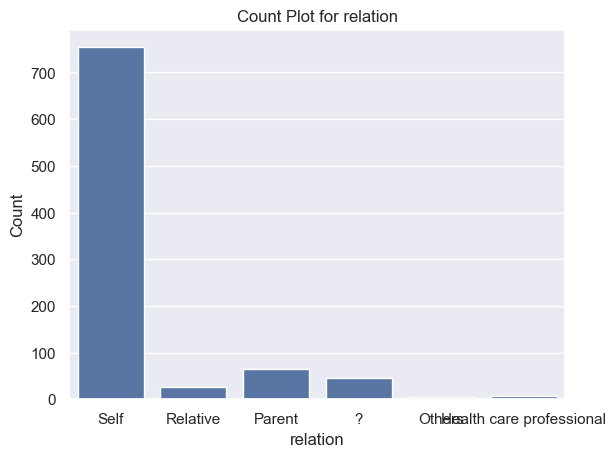

In [32]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

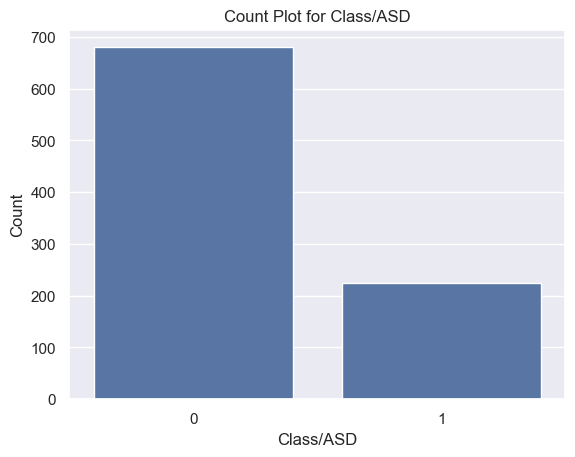

In [33]:
# countplot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

Handle the missing values in the ethnicity and relation column

In [34]:
df["ethnicity"]=df["ethnicity"].replace({"?":"Others","others":"Others"})

In [35]:
df["relation"]=df["relation"].replace(
    {"?":"Others",
     "Relative":"Others",
     "Parent":"Others",
     "Health care professional":"Others"
     }
    )

In [36]:
print(df["relation"].unique())
df["ethnicity"].unique()

['Self' 'Others']


array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [37]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,result,age_desc,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,6.351166,18 and more,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,2.255185,18 and more,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,14.851484,18 and more,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,2.276617,18 and more,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,-4.777286,18 and more,Self,0


Label Encoding

In [38]:
# identify column with object data type
object_columns=df.select_dtypes(include=["object"]).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'country_of_res',
       'age_desc', 'relation'],
      dtype='object')


In [39]:
df['age_desc'].unique()

array(['18 and more', '12-16 years'], dtype=object)

In [40]:
#initialize a dictionary to store the encoders 
encoders = {}

# Apply label encoding and store the encoders
for col in object_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder  # Saving the encoder for this column

# Save the encoder dictionary as a pickle file (after the loop)
with open("encoders1.pkl", "wb") as f:
    pickle.dump(encoders, f)

print("Encoders saved successfully!")

Encoders saved successfully!


In [41]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'country_of_res': LabelEncoder(),
 'age_desc': LabelEncoder(),
 'relation': LabelEncoder()}

Bivariate Analysis 

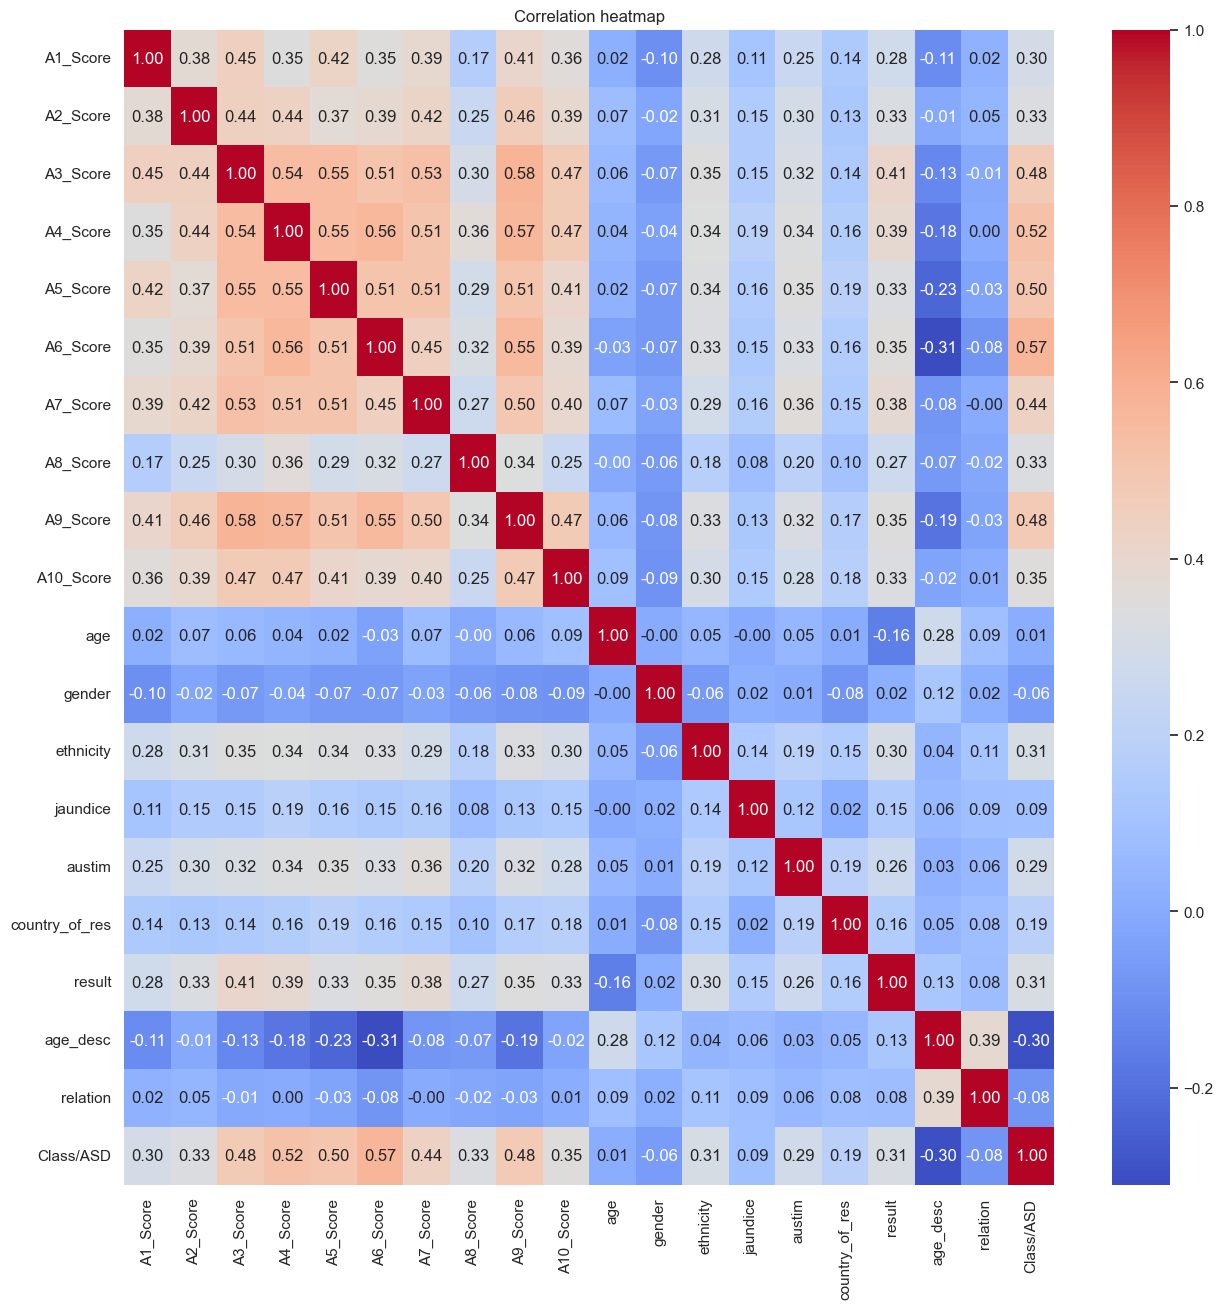

In [42]:
# correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

**Insight for EDA**
- There are few outlier in the numerical columns(age,result)
- There is a class imbalance in the traget column
- There is a class in the categorical features
- We don't have any highly correlated column
- Performed the label encoding and saved the encoders

**4.Data preprocessing**

Handling the outlier

In [43]:

#capping for data (preserves data while reduces the defualt of extreme values)
lower_bound = df["age"].quantile(0.05)  # 1st percentile
upper_bound = df["age"].quantile(0.95)  # 99th percentile

# Apply capping
df["age"] = np.where(df["age"] < lower_bound, lower_bound, df["age"])
df["age"] = np.where(df["age"] > upper_bound, upper_bound, df["age"])

# Display summary
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(df["age"].describe())
     

Lower Bound: 8.0, Upper Bound: 59.69999999999982
count    904.000000
mean      25.882965
std       14.283762
min        8.000000
25%       15.000000
50%       22.000000
75%       33.250000
max       59.700000
Name: age, dtype: float64


Train Test Split 

In [44]:
x =df.drop(columns=["Class/ASD"])

y=df["Class/ASD"]

In [45]:
print(x)
print(y)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
899         0         1         1         1         0         1         1   
900         1         0         1         0         0         0         0   
901         1         0         0         1         1         1         1   
902         1         1         0         1         1         0         0   
903         1         0         1         0         0         1         1   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [46]:
X_train ,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [47]:
print(y_train.shape)
print(y_test.shape)

(723,)
(181,)


In [48]:
y_train.value_counts()

Class/ASD
0    544
1    179
Name: count, dtype: int64

In [49]:
y_test.value_counts()

Class/ASD
0    136
1     45
Name: count, dtype: int64

SMOTE(Synthetic Minority Oversampling technique)

In [50]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)

In [51]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [52]:
print(y_train_smote.value_counts())

Class/ASD
1    544
0    544
Name: count, dtype: int64


In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Use resampled X_train
X_test_scaled = scaler.transform(X_test) 


**5.Model Traning**

In [54]:
# list of classifiers
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42),
    "KNN":KNeighborsClassifier(),
    "SVM":SVC()
}

In [55]:
#  dictionary to store the cross validation results
cv_scores={}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters...")

    # Use scaled data only for SVM and KNN, otherwise use X_train_smote
    if model_name in ["SVM", "KNN"]:
        X_train_used = X_train_scaled
        y_train_used = y_train  # Use original labels for these models
    else:
        X_train_used = X_train_smote
        y_train_used = y_train_smote

    # Perform cross-validation
    scores = cross_val_score(model, X_train_used, y_train_used, cv=5, scoring="accuracy")
    
    # Store results
    cv_scores[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    print("-" * 50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.88
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.91
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.91
--------------------------------------------------
Training KNN with default parameters...
KNN Cross-Validation Accuracy: 0.83
--------------------------------------------------
Training SVM with default parameters...
SVM Cross-Validation Accuracy: 0.87
--------------------------------------------------


In [56]:
# Inintializing models
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost_classifier=XGBClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()  # KNN classifier
svm_classifier = SVC()  # SVM classifier

In [57]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.5],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11],  
    "weights": ["uniform", "distance"],  
    "metric": ["euclidean", "manhattan", "minkowski"]
}

param_grid_svm = {
   'C': [0.5, 1, 2, 5,100],
    'gamma': [0.05, 0.1, 0.2, 0.5],
    'kernel': ['rbf']
}


In [58]:
# hyperparameter tuning for 3 tree based models

#perform RandomizedSearchCV for each model

# Decision Tree
random_search_dt = RandomizedSearchCV(estimator=decision_tree,
                                      param_distributions=param_grid_dt,
                                      n_iter=30,
                                      cv=5,
                                      scoring="accuracy",
                                      random_state=42)

# Random Forest
random_search_rf = RandomizedSearchCV(estimator=random_forest,
                                      param_distributions=param_grid_rf,
                                      n_iter=30,
                                      cv=5,
                                      scoring="accuracy",
                                      random_state=42)

# XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier,
                                       param_distributions=param_grid_xgb,
                                       n_iter=30,
                                       cv=5,
                                       scoring="accuracy",
                                       random_state=42)
# KNN
random_search_knn = RandomizedSearchCV(estimator=knn_classifier,
                                       param_distributions=param_grid_knn,
                                       n_iter=30,
                                       cv=5,
                                       scoring="accuracy",
                                       random_state=42)

# SVM
random_search_svm = RandomizedSearchCV(estimator=svm_classifier,
                                       param_distributions=param_grid_svm,
                                       n_iter=30,
                                       cv=5,
                                       scoring="accuracy",
                                       verbose=2,
                                       n_jobs=-1,
                                       random_state=42)

In [59]:
# fit the models
random_search_dt.fit(X_train_smote,y_train_smote)
random_search_rf.fit(X_train_smote,y_train_smote)
random_search_xgb.fit(X_train_smote,y_train_smote)
# KNN and SVM should use scaled data
random_search_knn.fit(X_train_scaled, y_train)
random_search_svm.fit(X_train_scaled, y_train)

C:\Users\brijm\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.5, 1, 2, 5, 100],
                                        'gamma': [0.05, 0.1, 0.2, 0.5],
                                        'kernel': ['rbf']},
                   random_state=42, scoring='accuracy', verbose=2)

In [60]:
y_test_pred=random_search_dt.predict(X_test)
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.8011049723756906
Confusion Matrix:
 [[111  25]
 [ 11  34]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       136
           1       0.58      0.76      0.65        45

    accuracy                           0.80       181
   macro avg       0.74      0.79      0.76       181
weighted avg       0.83      0.80      0.81       181



In [61]:
y_test_pred=random_search_rf.predict(X_test)
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.8729281767955801
Confusion Matrix:
 [[126  10]
 [ 13  32]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       136
           1       0.76      0.71      0.74        45

    accuracy                           0.87       181
   macro avg       0.83      0.82      0.83       181
weighted avg       0.87      0.87      0.87       181



In [62]:
y_test_pred=random_search_xgb.predict(X_test)
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.8287292817679558
Confusion Matrix:
 [[119  17]
 [ 14  31]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       136
           1       0.65      0.69      0.67        45

    accuracy                           0.83       181
   macro avg       0.77      0.78      0.78       181
weighted avg       0.83      0.83      0.83       181



In [63]:
y_test_pred=random_search_knn.predict(X_test_scaled)
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.8232044198895028
Confusion Matrix:
 [[117  19]
 [ 13  32]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       136
           1       0.63      0.71      0.67        45

    accuracy                           0.82       181
   macro avg       0.76      0.79      0.77       181
weighted avg       0.83      0.82      0.83       181



In [64]:
y_test_pred=random_search_svm.predict(X_test_scaled)
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.8674033149171271
Confusion Matrix:
 [[130   6]
 [ 18  27]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       136
           1       0.82      0.60      0.69        45

    accuracy                           0.87       181
   macro avg       0.85      0.78      0.80       181
weighted avg       0.86      0.87      0.86       181



In [65]:
# Get the model with the best score
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_score = random_search_dt.best_score_
    best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
    best_score = random_search_rf.best_score_
    best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score:
    best_score = random_search_xgb.best_score_
    best_model = random_search_xgb.best_estimator_

if random_search_knn.best_score_ > best_score:
    best_score = random_search_knn.best_score_
    best_model = random_search_knn.best_estimator_

if random_search_svm.best_score_ > best_score:
    best_score = random_search_svm.best_score_
    best_model = random_search_svm.best_estimator_


In [66]:
print(f"Best Model:{best_model}")
print(f"Best Cross-Validation Accuracy:{best_score:.2f}")

Best Model:RandomForestClassifier(bootstrap=False, n_estimators=500, random_state=42)
Best Cross-Validation Accuracy:0.92


In [67]:
#save the best model
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

**7.Evalution**

In [68]:
# evaluate on test data
y_test_pred=best_model.predict(X_test)
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.8729281767955801
Confusion Matrix:
 [[126  10]
 [ 13  32]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       136
           1       0.76      0.71      0.74        45

    accuracy                           0.87       181
   macro avg       0.83      0.82      0.83       181
weighted avg       0.87      0.87      0.87       181



In [69]:
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'KNN', 'SVM']
accuracy = [0.801, 0.873, 0.829, 0.823, 0.867]

precision = [0.58, 0.76, 0.65, 0.63, 0.82]
recall = [0.76, 0.71, 0.69, 0.71, 0.60]
f1_score = [0.65, 0.74, 0.67, 0.67, 0.69]

# Confusion matrices
conf_matrices = {
    "Decision Tree": np.array([[111, 25], [11, 34]]),
    "Random Forest": np.array([[126, 10], [13, 32]]),
    "XGBoost": np.array([[119, 17], [14, 31]]),
    "KNN": np.array([[117, 19], [13, 32]]),
    "SVM": np.array([[130, 6], [18, 27]])
}

C:\Users\brijm\AppData\Local\Temp\ipykernel_33480\3579975508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette="viridis")


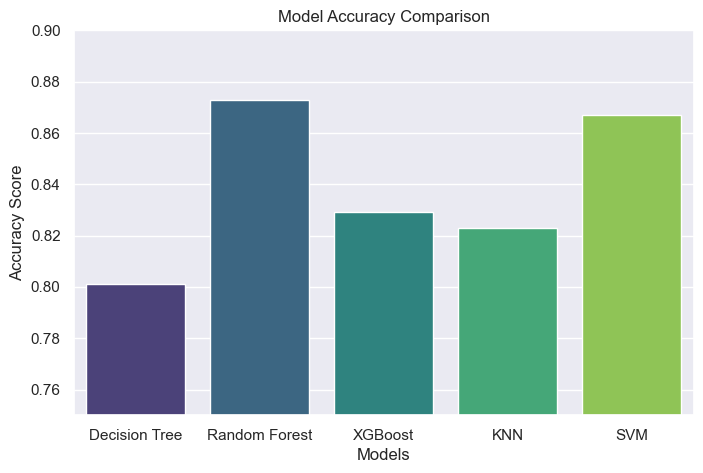

In [70]:
# 1. Accuracy Comparison (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy, palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0.75, 0.90)
plt.show()

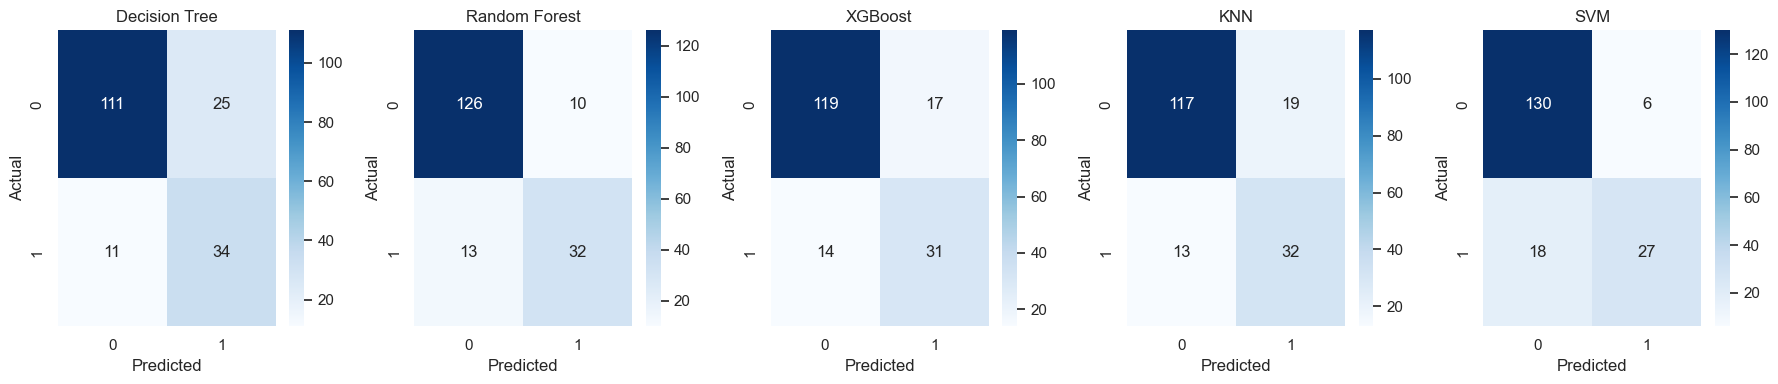

In [71]:
# 2. Confusion Matrix Heatmaps
fig, axes = plt.subplots(1, 5, figsize=(18, 4))
for ax, (model, matrix) in zip(axes, conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues", ax=ax)
    ax.set_title(model)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

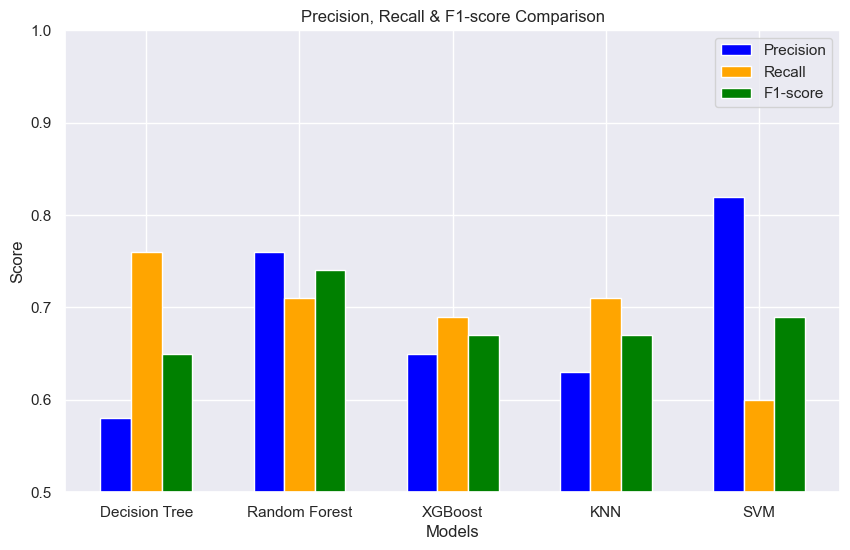

In [72]:
# 3. Precision, Recall, F1-score (Grouped Bar Chart)
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label="Precision", color="blue")
ax.bar(x, recall, width, label="Recall", color="orange")
ax.bar(x + width, f1_score, width, label="F1-score", color="green")

ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Precision, Recall & F1-score Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.ylim(0.5, 1)
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

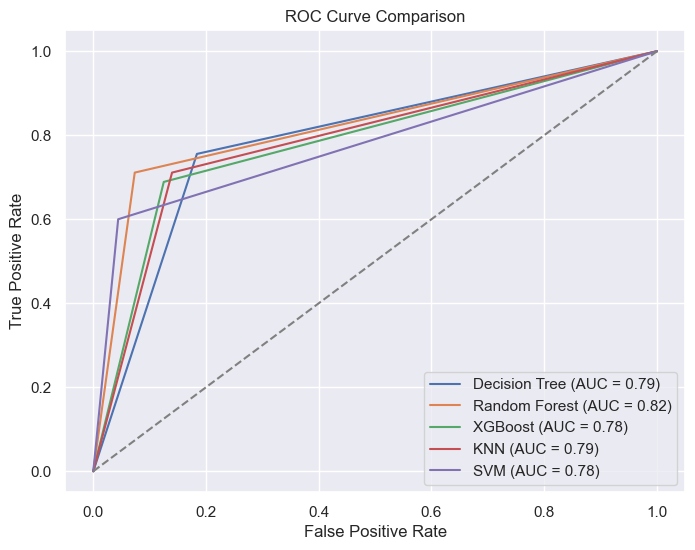

In [74]:
# 4. ROC Curve
plt.figure(figsize=(8, 6))
for model, matrix in conf_matrices.items():
    tn, fp, fn, tp = matrix.ravel()
    fpr, tpr, _ = roc_curve([0] * (tn + fp) + [1] * (fn + tp), [0] * tn + [1] * fp + [0] * fn + [1] * tp)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

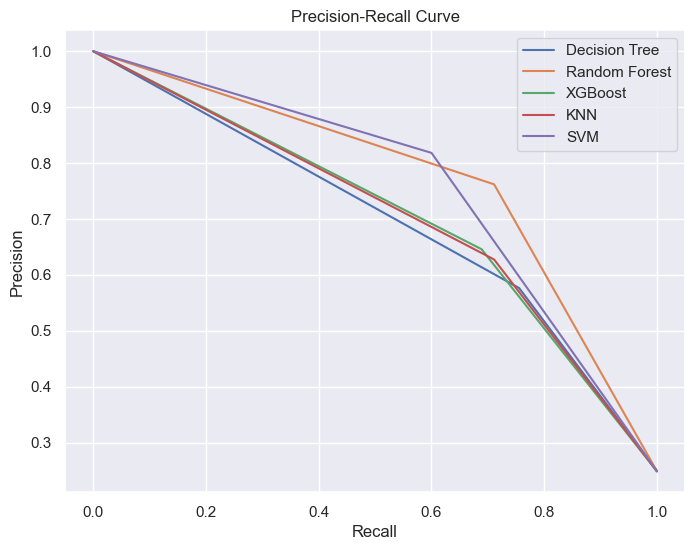

In [75]:
# 5. Precision-Recall Curve
plt.figure(figsize=(8, 6))
for model, matrix in conf_matrices.items():
    tn, fp, fn, tp = matrix.ravel()
    precision_vals, recall_vals, _ = precision_recall_curve([0] * (tn + fp) + [1] * (fn + tp), [0] * tn + [1] * fp + [0] * fn + [1] * tp)
    plt.plot(recall_vals, precision_vals, label=model)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

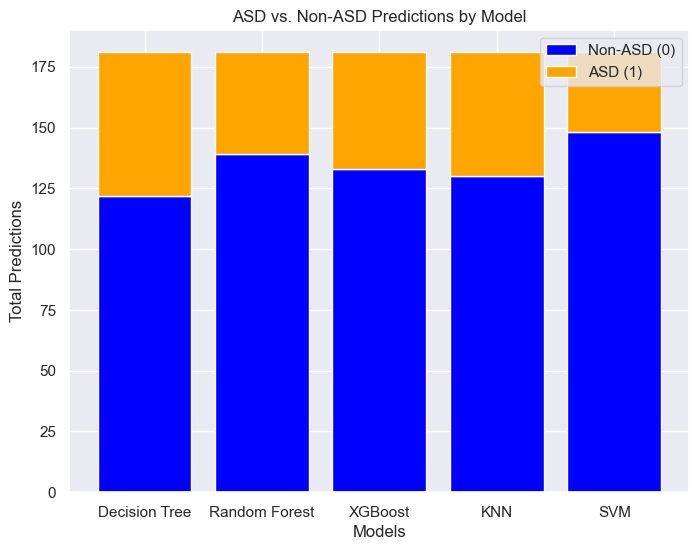

In [76]:
models = list(conf_matrices.keys())
non_asd_preds = [conf_matrices[m][0, 0] + conf_matrices[m][1, 0] for m in models]  # True Negative + False Negative
asd_preds = [conf_matrices[m][0, 1] + conf_matrices[m][1, 1] for m in models]  # False Positive + True Positive

plt.figure(figsize=(8, 6))
plt.bar(models, non_asd_preds, label="Non-ASD (0)", color="blue")
plt.bar(models, asd_preds, bottom=non_asd_preds, label="ASD (1)", color="orange")

plt.xlabel("Models")
plt.ylabel("Total Predictions")
plt.title("ASD vs. Non-ASD Predictions by Model")
plt.legend()
plt.show()

In [77]:
# Model Names
models = ["Decision Tree", "Random Forest", "XGBoost", "KNN", "SVM"]

# Accuracy Scores
accuracy_scores = [0.801, 0.873, 0.829, 0.823, 0.867]  # Given accuracy values

# Precision, Recall, and F1-score for Non-ASD (0) and ASD (1)
precision_non_asd = [0.91, 0.91, 0.89, 0.90, 0.88]
recall_non_asd = [0.82, 0.93, 0.88, 0.86, 0.96]
f1_non_asd = [0.86, 0.92, 0.88, 0.88, 0.92]

precision_asd = [0.58, 0.76, 0.65, 0.63, 0.82]
recall_asd = [0.76, 0.71, 0.69, 0.71, 0.60]
f1_asd = [0.65, 0.74, 0.67, 0.67, 0.69]

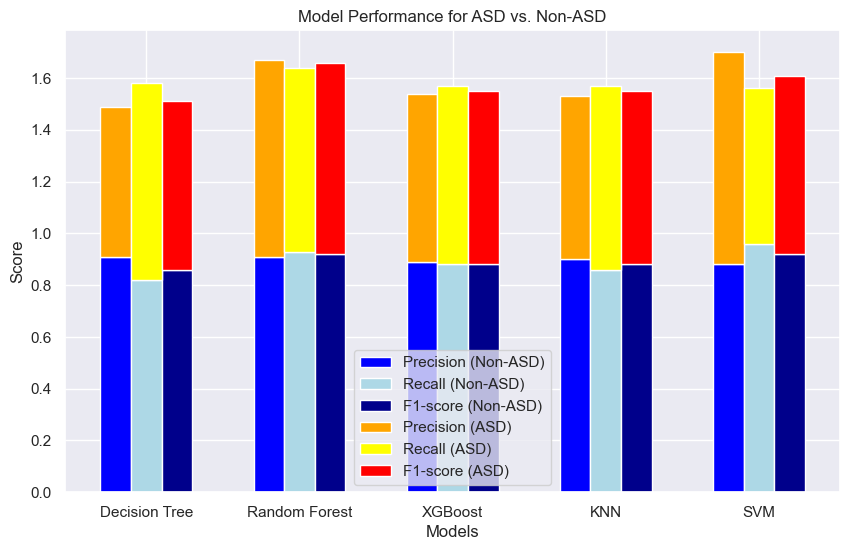

In [79]:
x = np.arange(len(models))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, precision_non_asd, width, label="Precision (Non-ASD)", color="blue")
ax.bar(x, recall_non_asd, width, label="Recall (Non-ASD)", color="lightblue")
ax.bar(x + width, f1_non_asd, width, label="F1-score (Non-ASD)", color="darkblue")

ax.bar(x - width, precision_asd, width, label="Precision (ASD)", color="orange", bottom=precision_non_asd)
ax.bar(x, recall_asd, width, label="Recall (ASD)", color="yellow", bottom=recall_non_asd)
ax.bar(x + width, f1_asd, width, label="F1-score (ASD)", color="red", bottom=f1_non_asd)

ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Performance for ASD vs. Non-ASD")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()

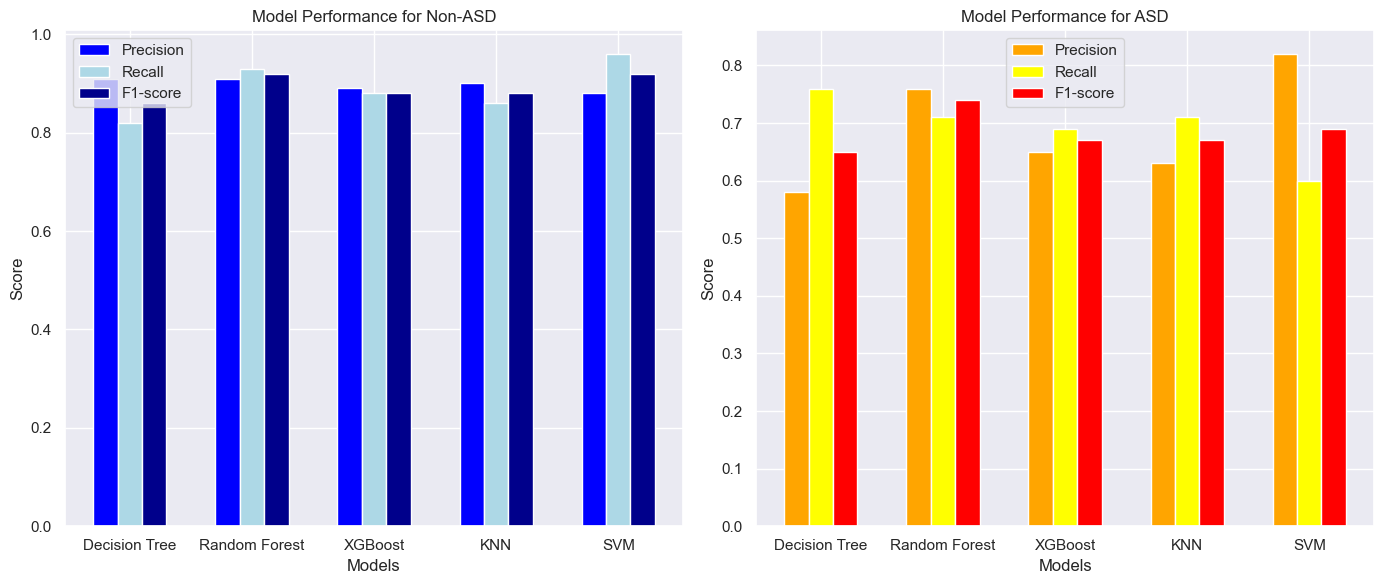

In [81]:
# Model Names
models = ["Decision Tree", "Random Forest", "XGBoost", "KNN", "SVM"]

# Performance Metrics for Non-ASD (0)
precision_non_asd = [0.91, 0.91, 0.89, 0.90, 0.88]
recall_non_asd = [0.82, 0.93, 0.88, 0.86, 0.96]
f1_non_asd = [0.86, 0.92, 0.88, 0.88, 0.92]

# Performance Metrics for ASD (1)
precision_asd = [0.58, 0.76, 0.65, 0.63, 0.82]
recall_asd = [0.76, 0.71, 0.69, 0.71, 0.60]
f1_asd = [0.65, 0.74, 0.67, 0.67, 0.69]

# Bar width and positions
x = np.arange(len(models))  # Label locations
width = 0.2  # Bar width

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ------------------- NON-ASD PERFORMANCE -------------------
axs[0].bar(x - width, precision_non_asd, width, label="Precision", color="blue")
axs[0].bar(x, recall_non_asd, width, label="Recall", color="lightblue")
axs[0].bar(x + width, f1_non_asd, width, label="F1-score", color="darkblue")

axs[0].set_xlabel("Models")
axs[0].set_ylabel("Score")
axs[0].set_title("Model Performance for Non-ASD")
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].legend()

# ------------------- ASD PERFORMANCE -------------------
axs[1].bar(x - width, precision_asd, width, label="Precision", color="orange")
axs[1].bar(x, recall_asd, width, label="Recall", color="yellow")
axs[1].bar(x + width, f1_asd, width, label="F1-score", color="red")

axs[1].set_xlabel("Models")
axs[1].set_ylabel("Score")
axs[1].set_title("Model Performance for ASD")
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


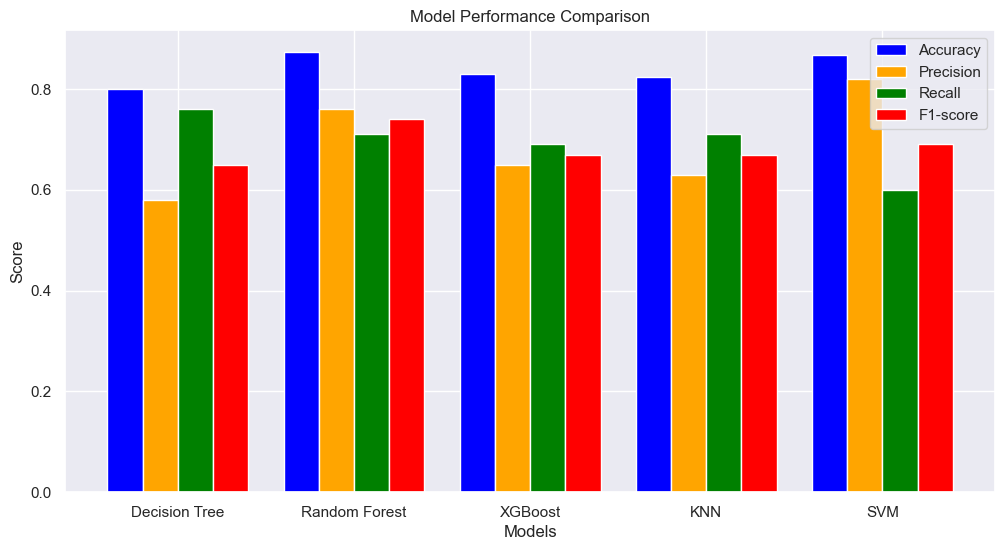

In [82]:


# Bar width and positions
x = np.arange(len(models))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
ax.bar(x - 1.5 * width, accuracy, width, label="Accuracy", color="blue")
ax.bar(x - 0.5 * width, precision, width, label="Precision", color="orange")
ax.bar(x + 0.5 * width, recall, width, label="Recall", color="green")
ax.bar(x + 1.5 * width, f1_score, width, label="F1-score", color="red")

# Labels, title, and legend
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.show()
